In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
##CASE 1 - relu,softmax,rmsprop,50 epochs
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [5]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [6]:
 m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8421 - accuracy: 0.3042 - val_loss: 1.6469 - val_accuracy: 0.3791
Epoch 2/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4789 - accuracy: 0.4614 - val_loss: 1.5871 - val_accuracy: 0.4408
Epoch 3/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.3275 - accuracy: 0.5197 - val_loss: 1.3753 - val_accuracy: 0.5123
Epoch 4/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2427 - accuracy: 0.5516 - val_loss: 1.2455 - val_accuracy: 0.5566
Epoch 5/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.1888 - accuracy: 0.5729 - val_loss: 1.4333 - val_accuracy: 0.4704
Epoch 6/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.1448 - accuracy: 0.5918 - val_loss: 1.1597 - val_accuracy: 0.5899
Epoch 7/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.1041 - accuracy: 0.6082 - val_loss: 1

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

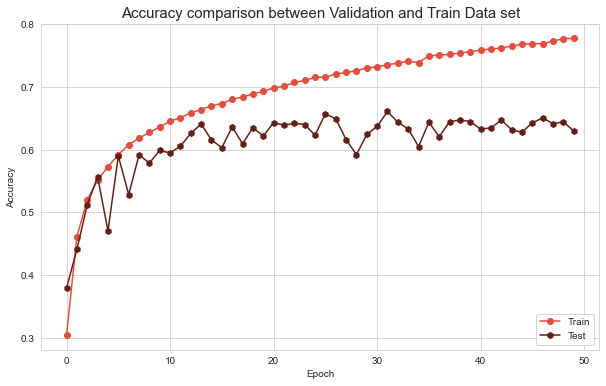

In [9]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

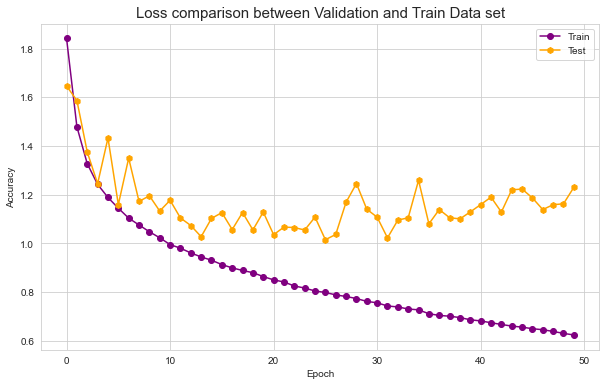

In [10]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

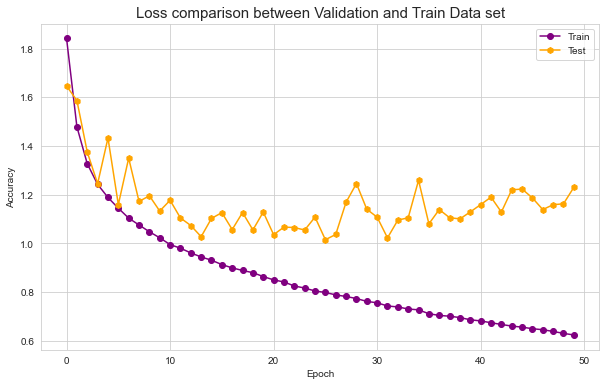

In [11]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [14]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

In [15]:
opt = keras.optimizers.Adamax(lr=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
 m2=model2.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 [==============================] - 176s 2s/step - loss: 2.8947 - accuracy: 0.2173 - val_loss: 2.3936 - val_accuracy: 0.1000
Epoch 2/100
100/100 [==============================] - 170s 2s/step - loss: 2.1804 - accuracy: 0.2777 - val_loss: 2.5536 - val_accuracy: 0.1000
Epoch 3/100
100/100 [==============================] - 171s 2s/step - loss: 1.9985 - accuracy: 0.3268 - val_loss: 2.9483 - val_accuracy: 0.1002
Epoch 4/100
100/100 [==============================] - 170s 2s/step - loss: 1.8467 - accuracy: 0.3671 - val_loss: 3.1018 - val_accuracy: 0.1303
Epoch 5/100
100/100 [==============================] - 170s 2s/step - loss: 1.7435 - accuracy: 0.4030 - val_loss: 2.8821 - val_accuracy: 0.1457
Epoch 6/100
100/100 [==============================] - 172s 2s/step - loss: 1.6419 - accuracy: 0.4363 - val_loss: 2.0840 - val_accuracy: 0.2597
Epoch 7/100
100/100 [==============================] - 170s 2s/step - loss: 1.5625 - accuracy: 0.4638 - val_loss: 1.5337 - val_accuracy:

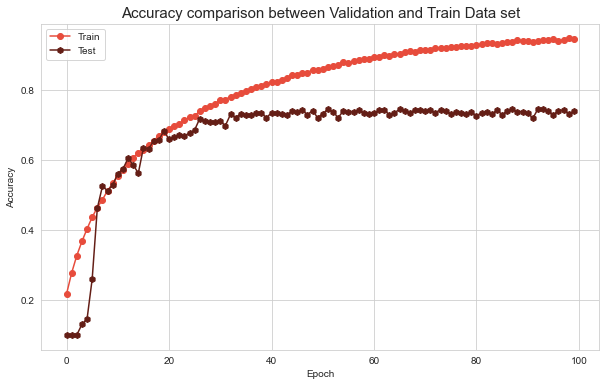

In [18]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

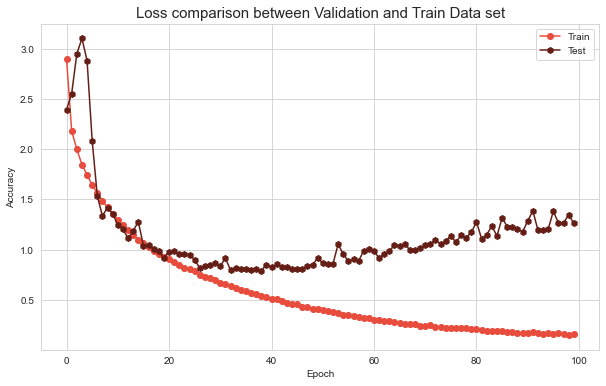

In [19]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [20]:
##CASE 3-tanh,softmax,epchs-100,adamax

model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(GlobalMaxPooling2D())
model3.add(Dense(500))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_17 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 48)       

In [21]:
#opt = keras.optimizers.Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [22]:
 m3=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=150,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/150
1563/1563 [==============================] - 146s 93ms/step - loss: 1.7613 - accuracy: 0.3342 - val_loss: 1.5262 - val_accuracy: 0.4419
Epoch 2/150
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4538 - accuracy: 0.4694 - val_loss: 1.3468 - val_accuracy: 0.5138
Epoch 3/150
1563/1563 [==============================] - 145s 92ms/step - loss: 1.3171 - accuracy: 0.5277 - val_loss: 1.2866 - val_accuracy: 0.5379
Epoch 4/150
1563/1563 [==============================] - 150s 96ms/step - loss: 1.2426 - accuracy: 0.5580 - val_loss: 1.2209 - val_accuracy: 0.5615
Epoch 5/150
1563/1563 [==============================] - 150s 96ms/step - loss: 1.1864 - accuracy: 0.5800 - val_loss: 1.2001 - val_accuracy: 0.5713
Epoch 6/150
1563/1563 [==============================] - 149s 96ms/step - loss: 1.1478 - accuracy: 0.5934 - val_loss: 1.1483 - val_accuracy: 0.5897
Epoch 7/150
1563/1563 [==============================] - 149s 95ms/step - loss: 1.1093 - accuracy: 0.6070 - val_

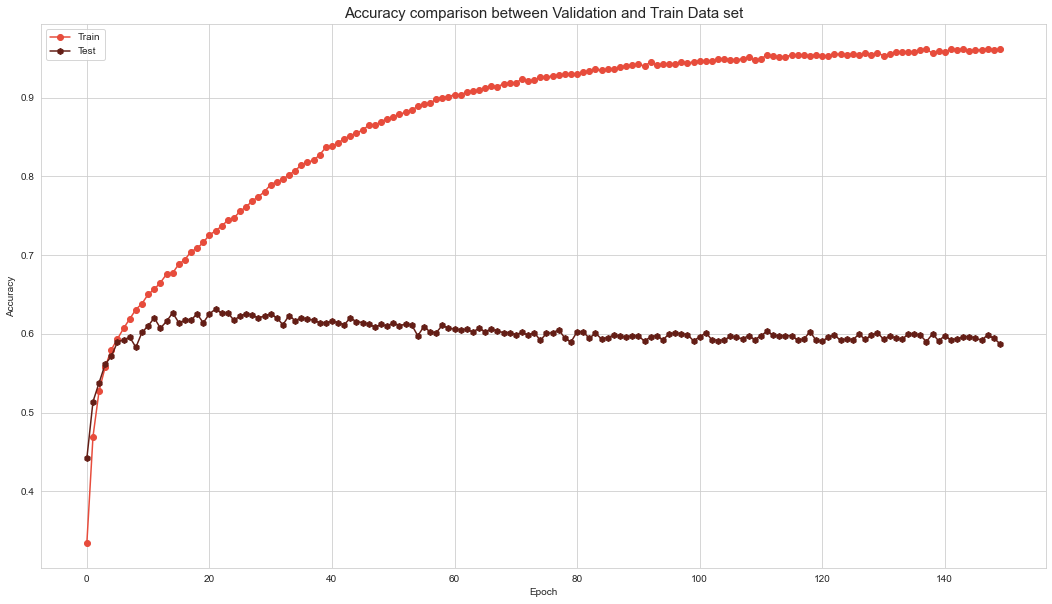

In [24]:
plt.figure(figsize=(18,10))
sb.set_style("whitegrid")
plt.plot(m3.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

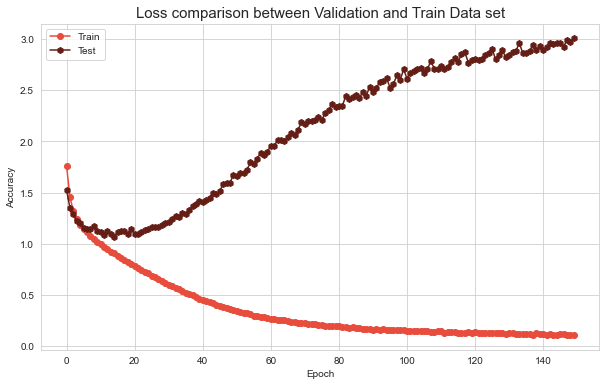

In [25]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()